In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# **Solving Diabetic problem with Pycaret library**

importing data and assign it to df

In [4]:
df=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [7]:
df.duplicated().sum() #checking for any duplicate record

0

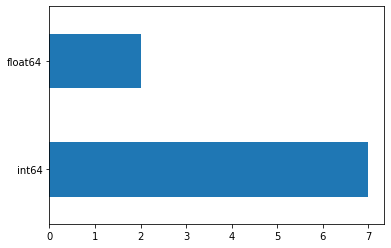

In [8]:
#Frequency Distribution of dtypes
df.dtypes.value_counts().plot(kind='barh')

0    500
1    268
Name: Outcome, dtype: int64


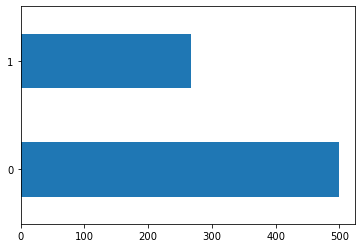

In [9]:
#Balanced dataset or not
print(df.Outcome.value_counts())
df.Outcome.value_counts().plot(kind='barh')

In [10]:
#We will define a fuction to give basic stats information

def simple_stats(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['min value'] = df.min()
    b['max value'] = df.max()
    b['Mean']=df.mean().T
    b['Median']=df.median().T
    b['Mode']=df.mode().T[0]
    b['Skewness'] = df.skew()
    b['dtype'] = df.dtypes
    return b

raw_stats=simple_stats(df)
raw_stats

,Missing value,N unique value,min value,max value,Mean,Median,Mode,Skewness,dtype
Pregnancies,0,17,0.000,17.00,3.845052,3.0000,1.000,0.901674,int64
Glucose,0,136,0.000,199.00,120.894531,117.0000,99.000,0.173754,int64
BloodPressure,0,47,0.000,122.00,69.105469,72.0000,70.000,-1.843608,int64
SkinThickness,0,51,0.000,99.00,20.536458,23.0000,0.000,0.109372,int64
Insulin,0,186,0.000,846.00,79.799479,30.5000,0.000,2.272251,int64
BMI,0,248,0.000,67.10,31.992578,32.0000,32.000,-0.428982,float64
DiabetesPedigreeFunction,0,517,0.078,2.42,0.471876,0.3725,0.254,1.919911,float64
Age,0,52,21.000,81.00,33.240885,29.0000,22.000,1.129597,int64
Outcome,0,2,0.000,1.00,0.348958,0.0000,0.000,0.635017,int64


From above following observations can conclude:

After looking mean and median and mode and histogram we came to know that most of features are skewed just because of the zero values concentration on one side, and having some outliers
On following columns, a value of zero does not make sense and thus indicates missing value.
Glucose
BloodPressure
SkinThickness
Insulin
BMI

It is better to replace zeros with NaN as to replace NaN with suitable values would be easier.

**Missing value treatment**

In [72]:
df_copy = df.copy(deep = True)
#replace zero values as nan in relevent columns
for i in df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]:
    df_copy[i].replace(0, np.nan, inplace= True)
stats_with_NAN=simple_stats(df_copy)
stats_with_NAN

,Missing value,N unique value,min value,max value,Mean,Median,Mode,Skewness,dtype
Pregnancies,0,17,0.000,17.00,3.845052,3.0000,1.000,0.901674,int64
Glucose,5,135,44.000,199.00,121.686763,117.0000,99.000,0.530989,float64
BloodPressure,35,46,24.000,122.00,72.405184,72.0000,70.000,0.134153,float64
SkinThickness,227,50,7.000,99.00,29.153420,29.0000,32.000,0.690619,float64
Insulin,374,185,14.000,846.00,155.548223,125.0000,105.000,2.166464,float64
BMI,11,247,18.200,67.10,32.457464,32.3000,32.000,0.593970,float64
DiabetesPedigreeFunction,0,517,0.078,2.42,0.471876,0.3725,0.254,1.919911,float64
Age,0,52,21.000,81.00,33.240885,29.0000,22.000,1.129597,int64
Outcome,0,2,0.000,1.00,0.348958,0.0000,0.000,0.635017,int64


*Lets do some visualization*

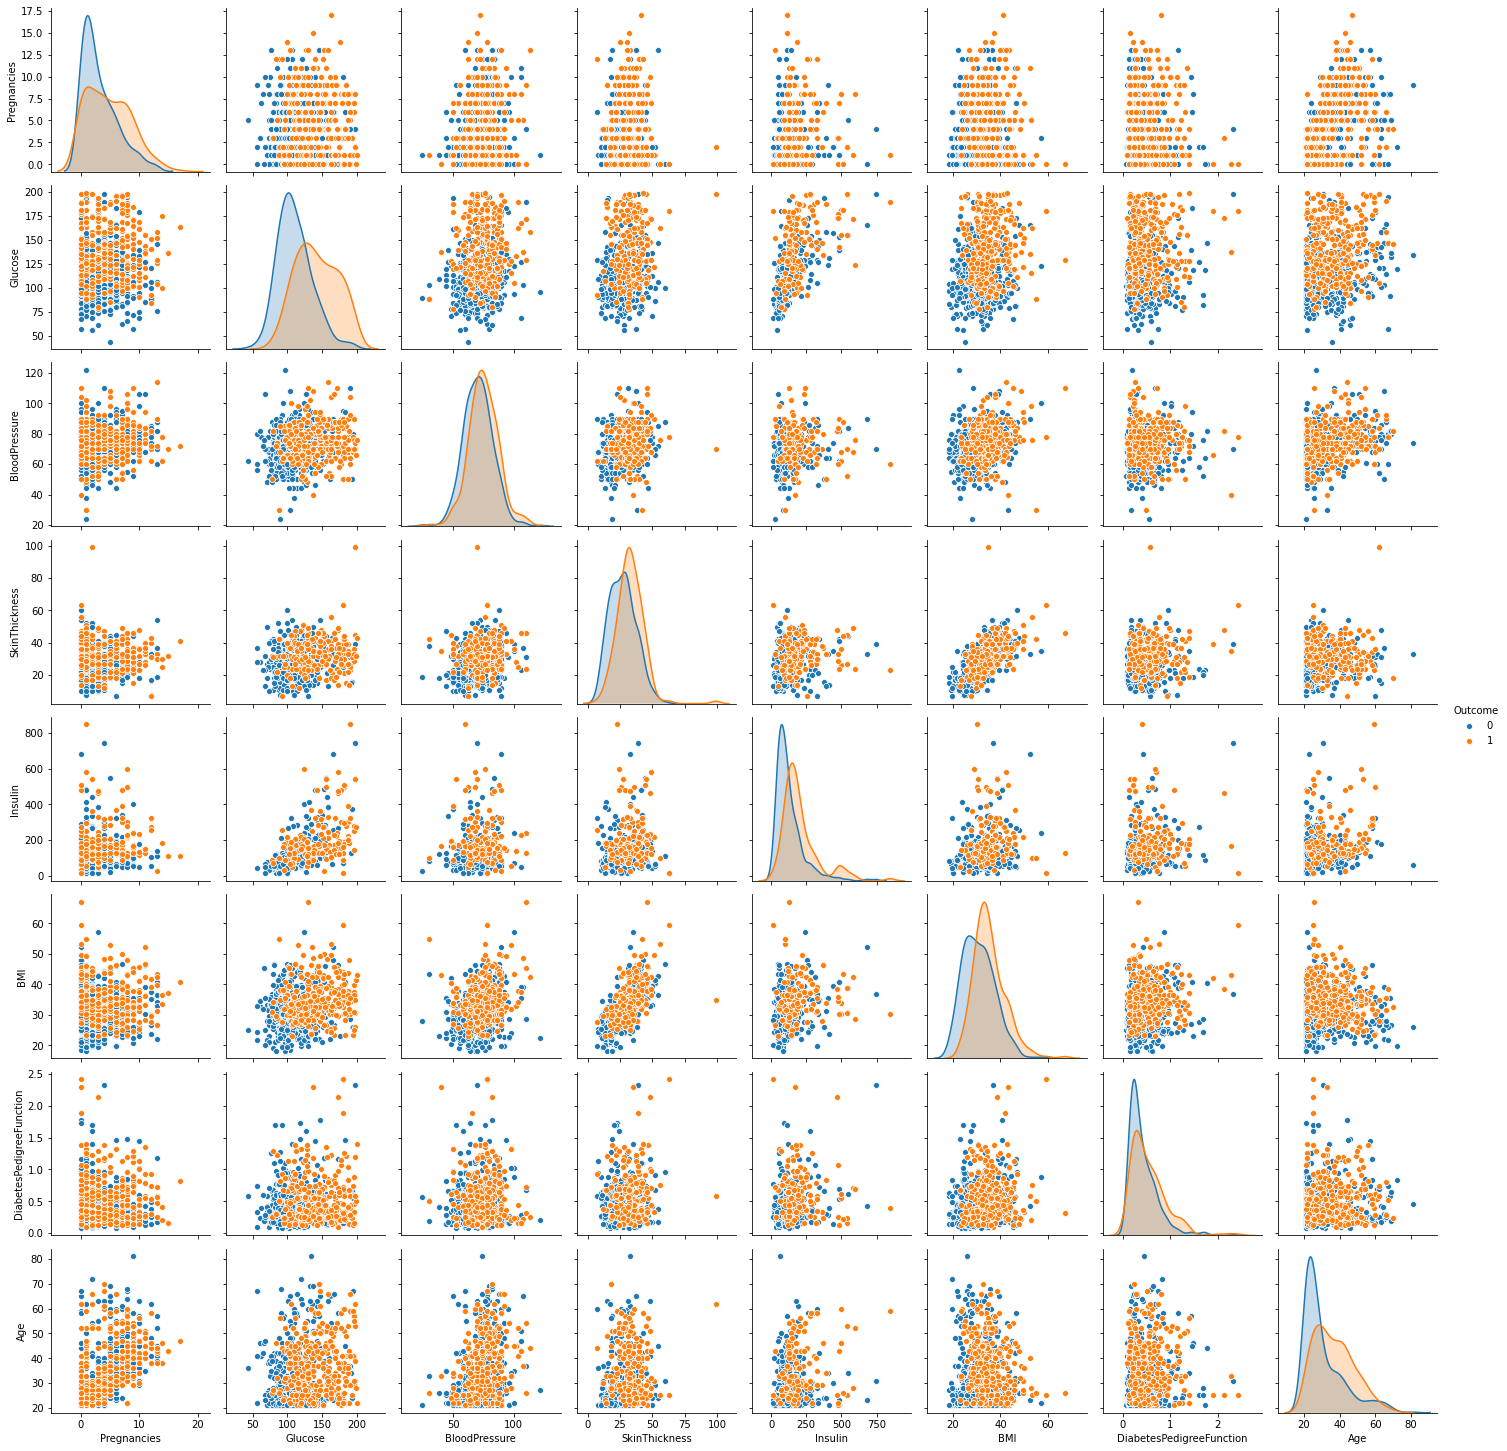

In [12]:
import seaborn as sns

sns.pairplot(df_copy, hue='Outcome')#,palette="husl")


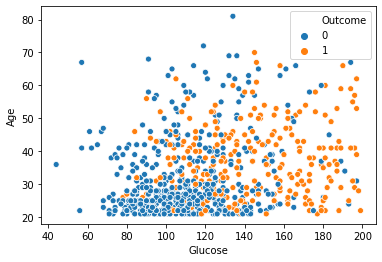

In [13]:
sns.scatterplot(x = df_copy['Glucose'], y = df_copy['Age'], hue = "Outcome",
                    data = df_copy)

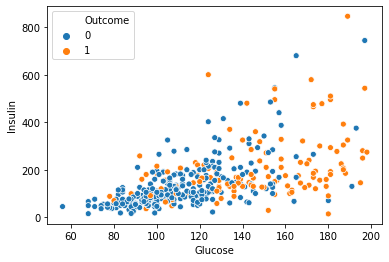

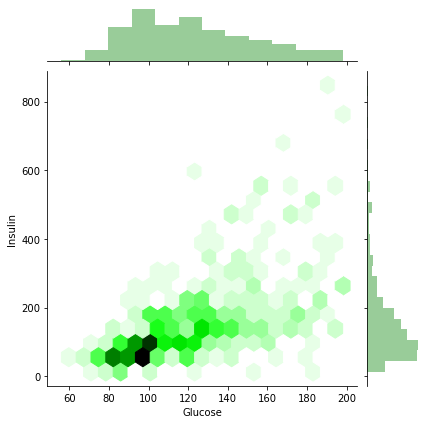

In [14]:

sns.scatterplot(x = df_copy['Glucose'], y = df_copy['Insulin'], hue = "Outcome",
                    data = df_copy)
sns.jointplot('Glucose','Insulin',data = df_copy,kind='hex',color = "g")

In [73]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [21]:
# !pip install pycaret

In [74]:
from pycaret.classification import *

In [75]:
#we will separate our train and test data.

data = df_copy.sample(frac=0.80, random_state=786)
data_unseen = df_copy.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Train Data for Modeling: ' + str(data.shape))
print('Test Data For Predictions: ' + str(data_unseen.shape))

Train Data for Modeling: (614, 9)
Test Data For Predictions: (154, 9)


In [76]:
#lets make setup required for claasification for using pycaret library
setup = setup(data = data, target = 'Outcome', session_id=123,normalize=True, remove_outliers=True, outliers_threshold=0.05)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(614, 9)"
4,Missing Values,True
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [77]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Gradient Boosting Classifier,0.764900,0.823400,0.552700,0.694300,0.606800,0.443800
1,Light Gradient Boosting Machine,0.764800,0.824700,0.617600,0.679600,0.635900,0.463500
2,Extreme Gradient Boosting,0.759800,0.821800,0.552200,0.668300,0.601400,0.433100
3,Random Forest Classifier,0.754900,0.796700,0.464800,0.711600,0.551700,0.396500
4,CatBoost Classifier,0.752400,0.824800,0.545600,0.653400,0.588100,0.415600
5,Logistic Regression,0.750100,0.820800,0.531900,0.667300,0.583100,0.409800
6,Ridge Classifier,0.747700,0.000000,0.524700,0.664500,0.579000,0.403800
7,Linear Discriminant Analysis,0.747700,0.814500,0.539000,0.661000,0.586200,0.408500
8,Extra Trees Classifier,0.747700,0.800500,0.465900,0.685600,0.545700,0.382900
9,K Neighbors Classifier,0.735300,0.759900,0.536800,0.623800,0.573800,0.383900


In [78]:
#lets create Extreme Gradient boosting
lgb=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6585,0.7910,0.5000,0.5000,0.5000,0.2407
1,0.7317,0.8386,0.5714,0.6154,0.5926,0.3930
2,0.7317,0.7460,0.6429,0.6000,0.6207,0.4135
3,0.8293,0.9048,0.7857,0.7333,0.7586,0.6268
4,0.7561,0.7963,0.5000,0.7000,0.5833,0.4176
5,0.7317,0.8413,0.7143,0.5882,0.6452,0.4327
6,0.8293,0.7940,0.6923,0.7500,0.7200,0.5975
7,0.8293,0.8709,0.4615,1.0000,0.6316,0.5393
8,0.7750,0.7806,0.6154,0.6667,0.6400,0.4767
9,0.7750,0.8832,0.6923,0.6429,0.6667,0.4972


In [79]:
#now lets hypertune with pycaret
tuned_lgb=tune_model('lightgbm',n_iter=200)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6341,0.7407,0.4286,0.4615,0.4444,0.1723
1,0.6585,0.7937,0.3571,0.5000,0.4167,0.1847
2,0.7073,0.7566,0.5000,0.5833,0.5385,0.3260
3,0.7561,0.9021,0.5714,0.6667,0.6154,0.4384
4,0.6585,0.7143,0.3571,0.5000,0.4167,0.1847
5,0.7317,0.8413,0.6429,0.6000,0.6207,0.4135
6,0.8293,0.8242,0.6923,0.7500,0.7200,0.5975
7,0.8780,0.8860,0.6154,1.0000,0.7619,0.6861
8,0.7000,0.7379,0.5385,0.5385,0.5385,0.3162
9,0.7500,0.8575,0.6923,0.6000,0.6429,0.4521


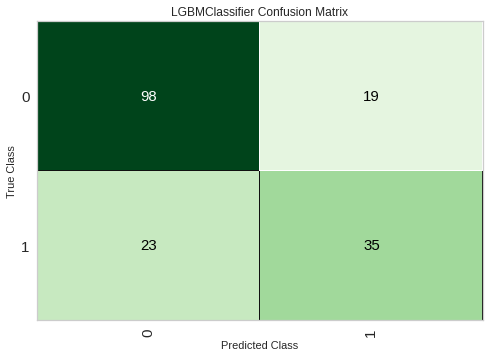

In [80]:
plot_model(tuned_lgb, plot = 'confusion_matrix')

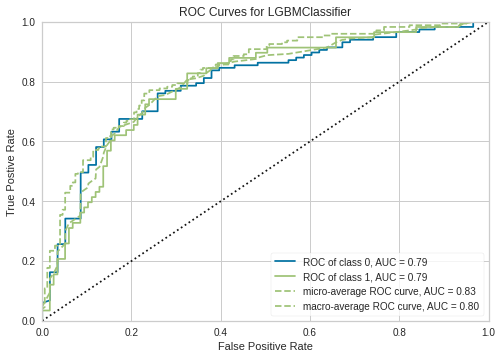

In [83]:
plot_model(tuned_lgb, plot = 'auc')

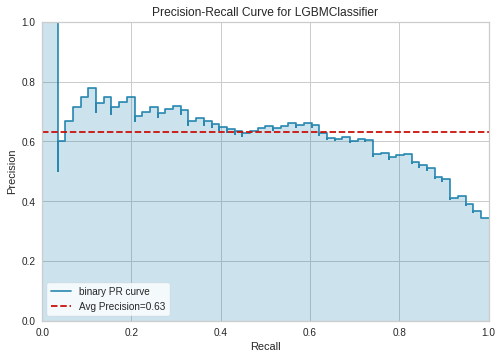

In [84]:
plot_model(tuned_lgb, plot = 'pr')

In [86]:
predict_model(estimator=tuned_lgb,data=data_unseen)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Label,Score
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0.0272
1,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0,0,0.0150
2,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0,0,0.1807
3,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1,1,0.7780
4,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1,1,0.6094
...,...,...,...,...,...,...,...,...,...,...,...
149,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1,1,0.8407
150,1,106.0,76.0,NaN,NaN,37.5,0.197,26,0,0,0.0411
151,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1,1,0.9452
152,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,0,0.1297


# **we have seen its so simple to train models using pycaret for beginners**